## Train the model

In [2]:
import tensorflow as tf
from utils.dataset import Dataset
from models.model import EfficientCapsNet

# loads dataset
dataset = Dataset(config_path='config_STSL.json')

# instantiates model
model_train = EfficientCapsNet(mode='train', verbose=True)

# get training and validation set
dataset_train, dataset_val = dataset.get_tf_data() 

[INFO] Dataset loaded!
Shape of x after first Conv2D: (None, 124, 124, 32)
Shape of x after second Conv2D: (None, 122, 122, 64)
Shape of x after third Conv2D: (None, 60, 60, 64)
Shape of x after fourth Conv2D: (None, 58, 58, 64)
Shape of x after fifth Conv2D: (None, 28, 28, 64)
Shape of x after sixth Conv2D: (None, 13, 13, 128)
Shape of x before PrimaryCaps: (None, 13, 13, 128)
Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 124, 124, 32)      832       
                                                                 
 batch_normalization_6 (Bat  (None, 124, 124, 32)      128       
 chNormalization)                                                
                                                                

In [14]:
import numpy as np

# Check validation set
# Convert one-hot encoding to class labels
class_labels = np.argmax(dataset.y_test, axis=1)

# Count frequency of each class
class_counts = np.bincount(class_labels)

# Print the counts
for i, count in enumerate(class_counts):
    print(f"Class {i}: {count} occurrences")


Class 0: 35 occurrences
Class 1: 22 occurrences
Class 2: 22 occurrences
Class 3: 34 occurrences
Class 4: 33 occurrences
Class 5: 39 occurrences
Class 6: 28 occurrences
Class 7: 31 occurrences
Class 8: 27 occurrences
Class 9: 28 occurrences
Class 10: 28 occurrences


In [3]:
# train model
history = model_train.train(dataset, initial_epoch=0)

------------------------------EfficientCapsNet train------------------------------
Epoch 1/30


2023-08-12 18:44:18.231718: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x117286d70 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-08-12 18:44:18.231738: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-08-12 18:44:18.246022: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


184/184 [==============================] - ETA: 0s - loss: 0.4399 - Efficient_CapsNet_loss: 0.4121 - Generator_loss: 0.0711 - Efficient_CapsNet_accuracy: 0.5388
Epoch 1: val_Efficient_CapsNet_accuracy improved from -inf to 0.08563, saving model to bin/efficient_capsnetSTSL_new_train.h5
184/184 [==============================] - 55s 296ms/step - loss: 0.4399 - Efficient_CapsNet_loss: 0.4121 - Generator_loss: 0.0711 - Efficient_CapsNet_accuracy: 0.5388 - val_loss: 0.6253 - val_Efficient_CapsNet_loss: 0.6220 - val_Generator_loss: 0.0083 - val_Efficient_CapsNet_accuracy: 0.0856 - lr: 5.0000e-04
Epoch 2/30
184/184 [==============================] - ETA: 0s - loss: 0.1165 - Efficient_CapsNet_loss: 0.1145 - Generator_loss: 0.0052 - Efficient_CapsNet_accuracy: 0.9160
Epoch 2: val_Efficient_CapsNet_accuracy improved from 0.08563 to 0.13456, saving model to bin/efficient_capsnetSTSL_new_train.h5
184/184 [==============================] - 56s 304ms/step - loss: 0.1165 - Efficient_CapsNet_loss: 0.

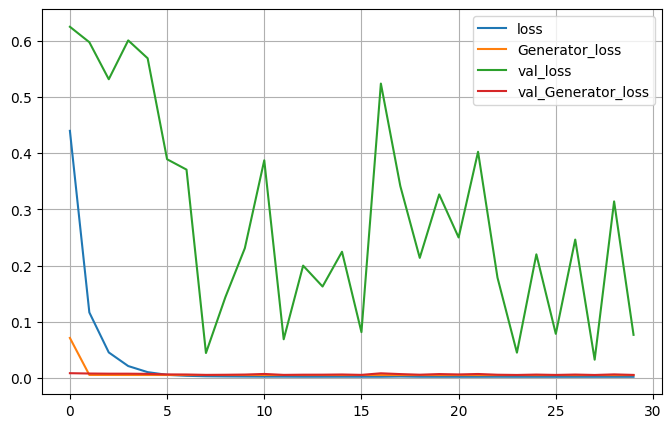

In [4]:
# Plot history
from utils.visualisation import plotImages, plotWrongImages, plotHistory

plotHistory(history)